# 三、pandas

## 1.Series 

### 1.1 Series的创建

In [193]:
import pandas as pd 
import numpy as np 

In [194]:
s1 = pd.Series(np.random.randint(10,80,10))

In [195]:
s1

0    17
1    26
2    71
3    37
4    25
5    54
6    14
7    16
8    43
9    27
dtype: int32

In [196]:
pd.Series([11,22,33,44,55],index=[1,2,3,4,5])

1    11
2    22
3    33
4    44
5    55
dtype: int64

In [197]:
s2 = pd.Series({'r':123,'b':456,'g':789})
s2

r    123
b    456
g    789
dtype: int64

### 1.2 Series的属性

In [198]:
s2.index

Index(['r', 'b', 'g'], dtype='object')

In [199]:
s2.values

array([123, 456, 789])

In [200]:
s2[1] #不推荐使用即将被弃用

C:\Users\24827\AppData\Local\Temp\ipykernel_25740\3686289156.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s2[1] #不推荐使用即将被弃用


np.int64(456)

In [201]:
s2['b']

np.int64(456)

## 2.DataFrame

### 2.1 DataFrame的创建

In [202]:
d1 = pd.DataFrame(np.random.randint(10,100,[5,3]))
d1

,0,1,2
0,34,15,69
1,15,73,92
2,57,38,55
3,74,22,38
4,31,98,35


In [203]:
stu = ["学生"+str(i) for i in range(d1.shape[0])]
stu

['学生0', '学生1', '学生2', '学生3', '学生4']

In [204]:
core = ["语文","数学","英语"]
core

['语文', '数学', '英语']

In [205]:
d2 = pd.DataFrame(np.random.randint(10,100,[5,3]),columns=core,index=stu)
d2

,语文,数学,英语
学生0,64,30,19
学生1,13,78,99
学生2,10,97,43
学生3,66,99,38
学生4,15,66,20


### 2.2 DataFrame的属性

In [206]:
d2.shape

(5, 3)

In [207]:
d2.index

Index(['学生0', '学生1', '学生2', '学生3', '学生4'], dtype='object')

In [208]:
d2.columns

Index(['语文', '数学', '英语'], dtype='object')

In [209]:
d2.values

array([[64, 30, 19],
       [13, 78, 99],
       [10, 97, 43],
       [66, 99, 38],
       [15, 66, 20]], dtype=int32)

In [210]:
d2.T

,学生0,学生1,学生2,学生3,学生4
语文,64,13,10,66,15
数学,30,78,97,99,66
英语,19,99,43,38,20


In [211]:
d2.head(2)

,语文,数学,英语
学生0,64,30,19
学生1,13,78,99


In [212]:
d2.tail(2)

,语文,数学,英语
学生3,66,99,38
学生4,15,66,20


In [213]:
new_stu = ["学生_"+str(i) for i in range(d2.shape[0])]
new_stu

['学生_0', '学生_1', '学生_2', '学生_3', '学生_4']

In [214]:
d2.index = new_stu

In [215]:
d2

,语文,数学,英语
学生_0,64,30,19
学生_1,13,78,99
学生_2,10,97,43
学生_3,66,99,38
学生_4,15,66,20


In [216]:
d3 = d2.reset_index()
d3

,index,语文,数学,英语
0,学生_0,64,30,19
1,学生_1,13,78,99
2,学生_2,10,97,43
3,学生_3,66,99,38
4,学生_4,15,66,20


In [217]:
d3.index

RangeIndex(start=0, stop=5, step=1)

In [218]:
d3.columns

Index(['index', '语文', '数学', '英语'], dtype='object')

In [219]:
d2.reset_index(drop=True)

,语文,数学,英语
0,64,30,19
1,13,78,99
2,10,97,43
3,66,99,38
4,15,66,20


In [220]:
d4 = pd.DataFrame({"month":[1,2,3,4],"year":[2022,2023,2024,2025],"day":[23,24,25,26]})
d4

,month,year,day
0,1,2022,23
1,2,2023,24
2,3,2024,25
3,4,2025,26


In [221]:
d5 = d4.set_index("year")
d5

,month,day
year,,
2022,1,23
2023,2,24
2024,3,25
2025,4,26


In [222]:
d5.index

Index([2022, 2023, 2024, 2025], dtype='int64', name='year')

In [223]:
d6 = d4.set_index(["year","month"])
d6

,,day
year,month,
2022,1,23
2023,2,24
2024,3,25
2025,4,26


In [224]:
d6.index

MultiIndex([(2022, 1),
            (2023, 2),
            (2024, 3),
            (2025, 4)],
           names=['year', 'month'])

## 3.MultiIndex

In [225]:
d6

,,day
year,month,
2022,1,23
2023,2,24
2024,3,25
2025,4,26


In [226]:
d6.index

MultiIndex([(2022, 1),
            (2023, 2),
            (2024, 3),
            (2025, 4)],
           names=['year', 'month'])

## 4.数据处理

### 4.1 基础函数使用

In [227]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 

In [228]:
data = pd.read_csv("./data/stock_day.csv")
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [229]:
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"],axis=1)
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


### 4.2 数据的索引

In [230]:
data["open"]["2018-02-27"]

np.float64(23.53)

In [231]:
data.loc["2018-02-27","open"]

np.float64(23.53)

In [232]:
data.iloc[0,0]

np.float64(23.53)

In [233]:
data.iloc[:3,:3]

,open,high,close
2018-02-27,23.53,25.88,24.16
2018-02-26,22.80,23.78,23.53
2018-02-23,22.88,23.37,22.82


In [234]:
data.loc[["2018-02-27","2018-02-14"],["open","close"]]

,open,close
2018-02-27,23.53,24.16
2018-02-14,21.49,21.92


In [235]:
data.iloc[:3,data.columns.get_indexer(["open","close"])]

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82


In [236]:
data.iloc[:5,[0,2]]

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92


### 4.3 数据的排序

In [237]:
data.sort_values(by = "open",ascending=False).head()

,open,high,close,low,volume,price_change,p_change,turnover
2015-06-15,34.99,34.99,31.69,31.69,199369.53,-3.52,-10.00,6.82
2015-06-12,34.69,35.98,35.21,34.01,159825.88,0.82,2.38,5.47
2015-06-10,34.10,36.35,33.85,32.23,269033.12,0.51,1.53,9.21
2017-11-01,33.85,34.34,33.83,33.10,232325.30,-0.61,-1.77,5.81
2015-06-11,33.17,34.98,34.39,32.51,173075.73,0.54,1.59,5.92


In [238]:
data.sort_index().head()

,open,high,close,low,volume,price_change,p_change,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16


In [239]:
data.sort_values(by = ["open","high"]).head()

,open,high,close,low,volume,price_change,p_change,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,3.30
2015-09-02,12.30,14.11,12.36,12.30,70201.74,-1.10,-8.17,2.40
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19


In [240]:
tmp = data
tmp["open"] = 1
tmp.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,1,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,1,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,1,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,1,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,1,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


### 4.3 算数运算

In [241]:
tmp.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,1,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,1,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,1,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,1,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,1,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


In [242]:
tmp["open"].add(10).head()

2018-02-27    11
2018-02-26    11
2018-02-23    11
2018-02-22    11
2018-02-14    11
Name: open, dtype: int64

### 4.4 逻辑运算

In [243]:
data = pd.read_csv("./data/stock_day.csv")
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"],axis=1)

In [244]:
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


In [245]:
data[data["open"]>22].head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,1.35


In [246]:
data[(data["open"] > 22) & (data["open"] < 23)].head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,1.35
2018-02-06,22.80,23.55,22.29,22.20,55555.00,-0.97,-4.17,1.39


In [247]:
data[data["open"].isin([22.1,22.6])]

,open,high,close,low,volume,price_change,p_change,turnover
2017-08-21,22.6,22.88,22.71,22.14,88234.07,0.31,1.38,2.21
2017-08-04,22.1,22.27,21.49,21.44,88873.78,-0.79,-3.55,2.22
2017-07-28,22.6,23.36,23.01,22.50,100094.83,0.25,1.10,2.51
2016-09-13,22.1,22.30,21.90,21.58,60927.69,-0.03,-0.14,2.09
2016-08-19,22.6,22.60,22.12,21.99,100071.53,-0.57,-2.51,3.43
2015-04-17,22.6,23.97,22.06,21.80,206773.17,-0.91,-3.96,7.08


In [248]:
data.query("open > 22.1 & open < 22.6").head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-05,22.45,23.39,23.27,22.25,52341.39,0.65,2.87,1.31
2018-02-02,22.40,22.70,22.62,21.53,33242.11,0.20,0.89,0.83
2018-01-03,22.42,22.83,22.79,22.18,74687.10,0.38,1.70,1.87
2018-01-02,22.30,22.54,22.42,22.05,42677.76,0.12,0.54,1.07


### 4.5 数据统计

In [249]:
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


In [250]:
data.describe()

,open,high,close,low,volume,price_change,p_change,turnover
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,2.936190
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,2.079375
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,0.040000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,1.360000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,2.500000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,3.915000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,12.560000


In [251]:
data["open"].min()

np.float64(12.25)

In [252]:
data.min(axis=0)

open              12.25
high              12.67
close             12.36
low               12.20
volume          1158.12
price_change      -3.52
p_change         -10.03
turnover           0.04
dtype: float64

In [253]:
data.idxmax()

open            2015-06-15
high            2015-06-10
close           2015-06-12
low             2015-06-12
volume          2017-10-26
price_change    2015-06-09
p_change        2015-08-28
turnover        2017-10-26
dtype: object

In [254]:
data["open"]["2015-06-15"]

np.float64(34.99)

In [255]:
data.max(0)

open                34.99
high                36.35
close               35.21
low                 34.01
volume          501915.41
price_change         3.03
p_change            10.03
turnover            12.56
dtype: float64

In [256]:
data.loc["2015-06-15","open"]

np.float64(34.99)

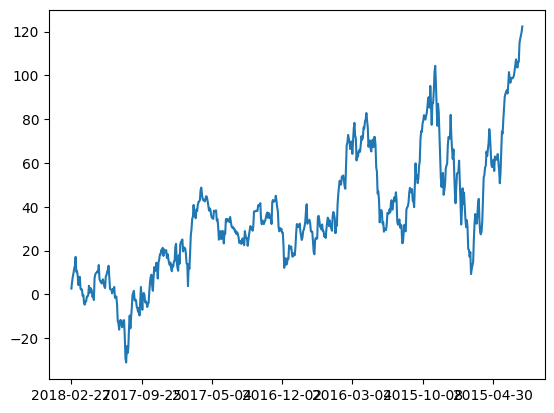

In [259]:
import matplotlib.pyplot as plt
data["p_change"].cumsum().plot()
plt.show()

### 4.6 自定义运算

In [264]:
data[["open"]].apply(lambda x: x-10, axis = 0)

,open
2018-02-27,13.53
2018-02-26,12.80
2018-02-23,12.88
2018-02-22,12.25
2018-02-14,11.49
...,...
2015-03-06,3.17
2015-03-05,2.88
2015-03-04,2.80
2015-03-03,2.52


In [265]:
data[["open","close"]].apply(lambda x: x.max() - x.min())

open     22.74
close    22.85
dtype: float64

### 4.7 读取数据

In [268]:
data = pd.read_csv("./data/stock_day.csv",usecols=["open","close"])
data.head()

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92


In [280]:
data.to_csv("./data/test.csv",index=True)

In [285]:
tmp = pd.read_csv("./data/test.csv",index_col=0)
tmp.head()

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92


In [290]:
data = pd.read_json("./data/Sarcasm_Headlines_Dataset.json",orient="records",lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [292]:
data.to_json("./data/test.json",orient="records",lines=True)

### 4.8 缺失值的处理

#### 4.8.1 缺失值为NAN

In [295]:
data = pd.read_csv("./data/IMDB-Movie-Data.csv")
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [296]:
np.all(data.notna())

np.False_

In [306]:
for i in data.columns:
    if np.all(data[i].notna()) != True:
        print(i)
        data[i] = data[i].fillna(data[i].mean())
    

In [307]:
np.all(data.notna())

np.True_

In [308]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,82.956376,22.0


#### 4.8.2 缺失值为其他

In [30]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [31]:
np.any(data.isna())

np.False_

In [32]:
data = data.dropna()

In [33]:
np.any(data.isna())

np.False_

### 4.9 数据离散化

In [34]:
import matplotlib.pyplot as plt 
import numpy as nu 
import pandas as pd 

In [38]:
data = pd.read_csv("./data/stock_day.csv")
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"],axis=1)
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


In [45]:
tmp = data["p_change"]
tmp

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
              ... 
2015-03-06    8.51
2015-03-05    2.02
2015-03-04    1.57
2015-03-03    1.44
2015-03-02    2.62
Name: p_change, Length: 643, dtype: float64

In [46]:
x = pd.qcut(tmp,10)
x

2018-02-27    (1.738, 2.938]
2018-02-26     (2.938, 5.27]
2018-02-23    (1.738, 2.938]
2018-02-22     (0.94, 1.738]
2018-02-14    (1.738, 2.938]
                   ...      
2015-03-06     (5.27, 10.03]
2015-03-05    (1.738, 2.938]
2015-03-04     (0.94, 1.738]
2015-03-03     (0.94, 1.738]
2015-03-02    (1.738, 2.938]
Name: p_change, Length: 643, dtype: category
Categories (10, interval[float64, right]): [(-10.030999999999999, -4.836] < (-4.836, -2.444] < (-2.444, -1.352] < (-1.352, -0.462] ... (0.94, 1.738] < (1.738, 2.938] < (2.938, 5.27] < (5.27, 10.03]]

In [47]:
x.value_counts()

p_change
(-10.030999999999999, -4.836]    65
(0.26, 0.94]                     65
(5.27, 10.03]                    65
(-0.462, 0.26]                   65
(-4.836, -2.444]                 64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(1.738, 2.938]                   64
(2.938, 5.27]                    64
(0.94, 1.738]                    63
Name: count, dtype: int64

In [44]:
# 指定区间分组

In [50]:
bins = [-100,-7,-5,-3,0,3,5,7,100]
x2 = pd.cut(tmp,bins)
x2.value_counts()

p_change
(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(5, 7]         35
(7, 100]       35
(-100, -7]     34
(-7, -5]       28
Name: count, dtype: int64

In [68]:
x3 = pd.get_dummies(x2,prefix="p_change").astype(np.int64)
x3.head()

,"p_change_(-100, -7]","p_change_(-7, -5]","p_change_(-5, -3]","p_change_(-3, 0]","p_change_(0, 3]","p_change_(3, 5]","p_change_(5, 7]","p_change_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


### 4.10 数据合并

In [76]:
pd.concat([data,x3],axis=1)

,open,high,close,low,volume,price_change,p_change,turnover,"p_change_(-100, -7]","p_change_(-7, -5]","p_change_(-5, -3]","p_change_(-3, 0]","p_change_(0, 3]","p_change_(3, 5]","p_change_(5, 7]","p_change_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16,0,0,0,0,0,0,0,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19,0,0,0,0,1,0,0,0
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30,0,0,0,0,1,0,0,0
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76,0,0,0,0,1,0,0,0


In [77]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [78]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [79]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [83]:
pd.merge(left,right,on=["key1","key2"],how="inner")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [84]:
pd.merge(left,right,on=["key1","key2"],how="outer")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


In [85]:
pd.merge(left,right,on=["key1","key2"],how="left")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [86]:
pd.merge(left,right,on=["key1","key2"],how="right")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


### 4.11 交叉表透视表

In [87]:
data

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58
...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76


In [90]:
date = pd.to_datetime(data.index).weekday
date

Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
       ...
       4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
      dtype='int32', length=643)

In [91]:
data["week"] = date
data

,open,high,close,low,volume,price_change,p_change,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58,2
...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16,4
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19,3
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30,2
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76,1


In [96]:
p = np.where(data["p_change"] > 0,1,0)

In [97]:
data["p"] = p 
data.head()

,open,high,close,low,volume,price_change,p_change,turnover,week,p
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58,2,1


In [102]:
# 交叉表
jx = pd.crosstab(data["week"],data["p"])
jx

p,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [125]:
s = jx.sum(axis = 1).astype(np.float32)
s

week
0    125.0
1    131.0
2    132.0
3    128.0
4    127.0
dtype: float32

In [126]:
re = jx.div(s)
re = re.drop([2,3,4],axis = 1)
re 

,0,1
week,,
0,0.504,0.473282
1,0.440,0.580153
2,0.488,0.541985
3,0.504,0.496183
4,0.472,0.519084


<Axes: xlabel='week'>

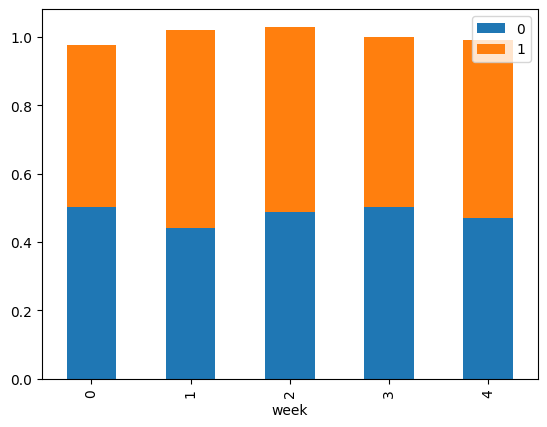

In [127]:
re.plot(kind = "bar",stacked = True)

In [128]:
# 透视表

In [131]:
data

,open,high,close,low,volume,price_change,p_change,turnover,week,p
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58,2,1
...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16,4,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19,3,1
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30,2,1
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76,1,1


In [145]:
t = data.pivot_table(["p"],index="week")
t

,p
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


In [146]:
t.columns

Index(['p'], dtype='object')

In [147]:
t.columns = ["赚"]
t

,赚
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


In [148]:
t["赔"] = 1-t["赚"]
t

,赚,赔
week,,
0,0.496000,0.504000
1,0.580153,0.419847
2,0.537879,0.462121
3,0.507812,0.492188
4,0.535433,0.464567


<Axes: xlabel='week'>

D:\MyLearningTools\MyPythonMain\Envs\data_handle\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36186 (\N{CJK UNIFIED IDEOGRAPH-8D5A}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\MyLearningTools\MyPythonMain\Envs\data_handle\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36180 (\N{CJK UNIFIED IDEOGRAPH-8D54}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\MyLearningTools\MyPythonMain\Envs\data_handle\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36186 (\N{CJK UNIFIED IDEOGRAPH-8D5A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\MyLearningTools\MyPythonMain\Envs\data_handle\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36180 (\N{CJK UNIFIED IDEOGRAPH-8D54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


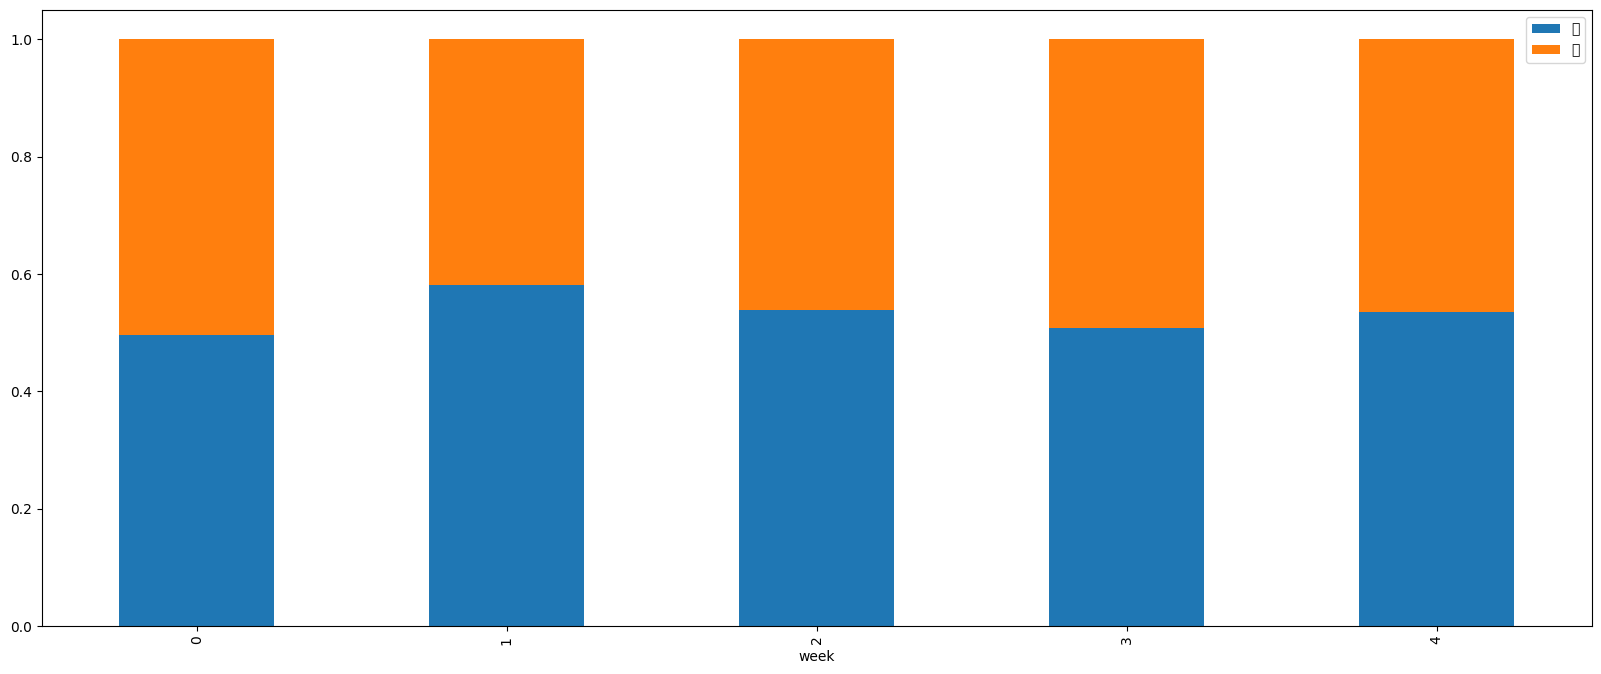

In [150]:
t.plot(kind = "bar",figsize = (20,8), stacked = True)

### 4.12 分组和聚合

In [151]:
data = pd.read_csv("./data/starbucks/directory.csv")
data

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


In [154]:
tmp = data.groupby(["Country"]).count()
tmp.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Phone Number,Timezone,Longitude,Latitude
Country,,,,,,,,,,,,
AD,1,1,1,1,1,1,1,1,1,1,1,1
AE,144,144,144,144,144,144,144,24,78,144,144,144
AR,108,108,108,108,108,108,108,100,29,108,108,108
AT,18,18,18,18,18,18,18,18,17,18,18,18
AU,22,22,22,22,22,22,22,22,0,22,22,22


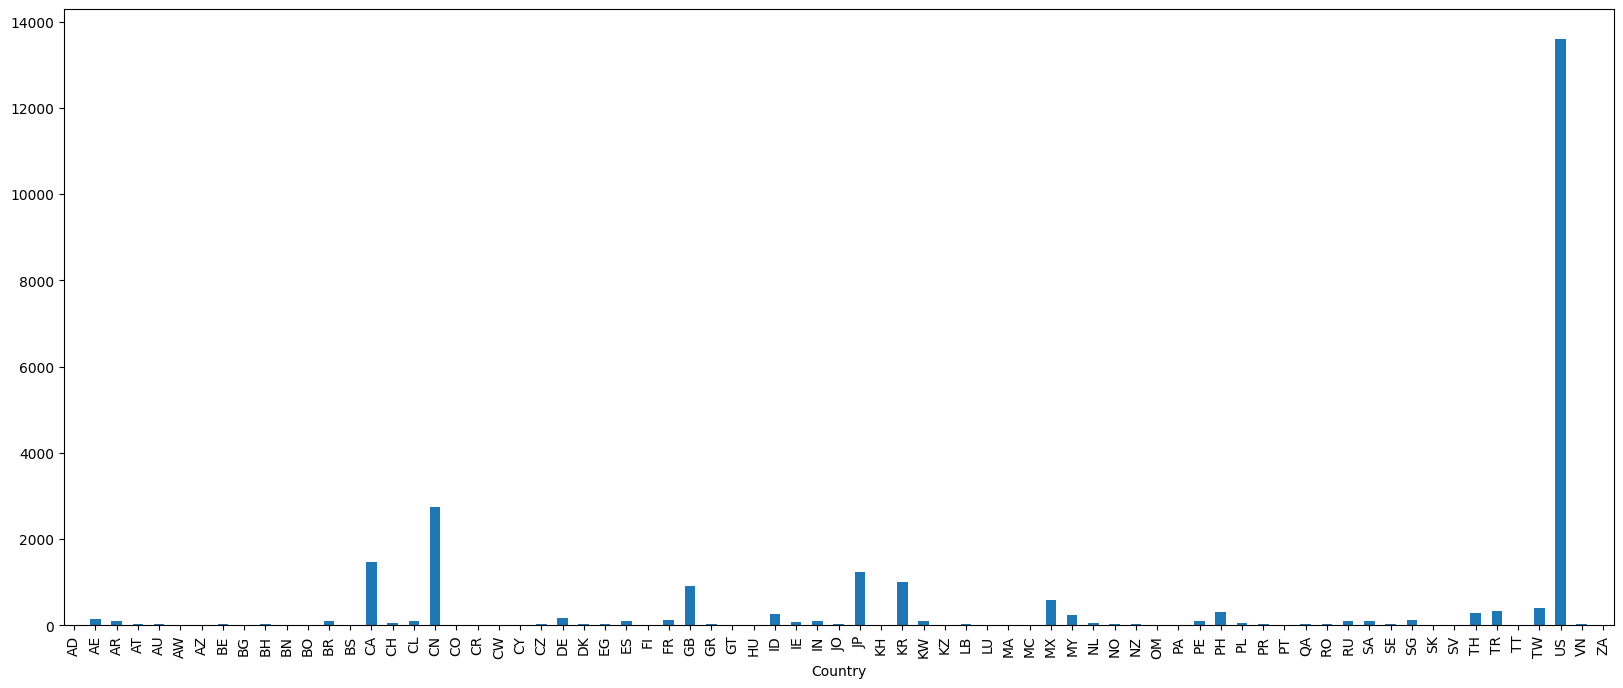

In [160]:
tmp["Brand"].plot(kind = "bar",figsize = (20,8))
plt.show()

In [163]:
t2 = data.groupby(["Country","State/Province"]).count()
t2

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]

## 5.电影案例分析

In [168]:
data = pd.read_csv("./data/IMDB-Movie-Data.csv")
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [171]:
#得出评分的平均分
data["Rating"].mean()

np.float64(6.723199999999999)

In [174]:
#得出导演人数信息
data["Director"].unique()

array(['James Gunn', 'Ridley Scott', 'M. Night Shyamalan',
       'Christophe Lourdelet', 'David Ayer', 'Yimou Zhang',
       'Damien Chazelle', 'Sean Foley', 'James Gray', 'Morten Tyldum',
       'David Yates', 'Theodore Melfi', 'Gareth Edwards', 'Ron Clements',
       'Nacho Vigalondo', 'Chris Renaud', 'Mel Gibson', 'Paul Greengrass',
       'Garth Davis', 'Denis Villeneuve', 'Stephen Gaghan',
       'Kenneth Lonergan', 'Ben Young', 'Walt Dohrn', 'Roland Emmerich',
       'Dominique Abel', 'S.S. Rajamouli', 'Phillip Guzman', 'Jon Lucas',
       'Justin Kurzel', 'John Hamburg', 'Tom Ford', 'Bryan Singer',
       'Tim Miller', 'Paul W.S. Anderson', 'Anthony Russo',
       'Christopher Nolan', 'Scott Derrickson', 'Antoine Fuqua',
       'Patrick Read Johnson', 'Greg Tiernan', 'Barry Jenkins',
       'Shawn Burkett', 'John Lee Hancock', 'Ricardo de Montreuil',
       'Rob Marshall', 'John Madden', 'Scott Hicks', 'Justin Lin',
       'Sean Penn', 'J.J. Abrams', 'Anna Foerster', 'Garry Mar

In [178]:
np.array([1,2,3]).shape

(3,)